# My favorite Scikit-Learn algorithms

This notebook contains a demonstrations and visualisations of my three favorite algorithms available through scikit-learn Python library [1]. 

## 1. Choosing Scikit-Learn: The Benefits

Scikit-learn is one of the most useful open-source libraries available for Python, widely used for Machine Learning purposes. It contains large collection of very efficient statistical and machile learning tools, e.g. regression, classification, dimensionary reduction and clustering.
It has been developed by David Cournapeau initially and it developed in the communicity-driven project where anyone can contribute towards its development. It is built upon NumPy [4], SciPy [5] and Matplotlib [6].


As mentioned, scikit-learn comes with plenty of interesting features. Some of which are:
* **Supervised learning argorithms**, e.g. Linear regression, Decision Trees, Bayesian methods
* **Unsupervised learning algorithms** e.g. custer analysis, factoring, unsupervised neural networks
* **Feature extraction**, meaning you can extract features from pictures or text
* **Cross validation**, meaning that validity of supervised models on unseen data can be validated and checked for accuracy
* **Dimensionality reduction**, meaning a number of attributes in data can be reduced for subsequent visualization, summarization or feature selection
* **Clustering** i.e. grouping of unlabeled data
* **Ensemble methods**, meaning predictions of several supervised models combines

Scikit-learn is a great choice of library for machine learning and there are many benefits to it:
* It is free with minimum licencing restrictions
* It is user friendly and easy to use
* It is versatile and useful for different real-life situations
* Provides clear and useful documentations for both end users or users who want to implement the algorithms to their own platforms

## 2. Installing Scikit-Learn

There are some prerequisites, so make sure you have the following installed:
* Python (>=3.5)
* NumPy (>=1.11.0)
* SciPy (>=0.17.0)
* Joblib (>=0.11)
* Matplotlib (>=1.5.1)
* Pandas (>=0.18.0)

All instructions with regards to installation can be found in the main documentation of scikit-learn library [2]. For more information refer to [this link](http://scikit-learn.org/stable/install.html). Anaconda [3] comes with scikit-learn by default, but, if needed it can be installed manually by typing `conda install scikit-learn` in a terminal.

## 3. Algorithm 1

## 4. Algorithm 2

## 5. Algorithm 3

## 6. Conclusion

# Practice

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as ply

Data->model->prediction

Data
-x e.g. info about the house
-y e.g. house prices


Now we pass this to model such that we can predict y using x.

In [2]:
from sklearn.datasets import load_boston #house prices in the 70s in Boston

In [3]:
X,y=load_boston(return_X_y=True) #set the variables from the dataset

Now model learns from data.
Phase 1. create the model -> python object
Phase 2. model learns from the data -> .fit(x,y) 

In [4]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [5]:
mod=KNeighborsRegressor()

In [6]:
mod.fit(X,y) #before fitting we cannot predict

KNeighborsRegressor()

In [7]:
pred=mod.predict(X)

In [8]:
mod2=LinearRegression() #different model,same process

In [9]:
mod2.fit(X,y)

LinearRegression()

In [10]:
mod2.predict(X) #output is different as the model is different

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211,
       18.99949651, 21.58679568, 20.90652153, 19.55290281, 19.28348205,
       19.29748321, 20.52750979, 16.91140135, 16.17801106, 18.40613603,
       12.52385753, 17.67103669, 15.83288129, 13.80628535, 15.67833832,
       13.38668561, 15.46397655, 14.70847428, 19.54737285, 20.8764282 ,
       11.45511759, 18.05923295,  8.81105736, 14.28275814, 13.70675891,
       23.81463526, 22.34193708, 23.10891142, 22.91502612, 31.35762569,
       34.21510225, 28.02056414, 25.20386628, 24.60979273, 22.94149176,
       22.09669817, 20.42320032, 18.03655088,  9.10655377, 17.20607751,
       21.28152535, 23.97222285, 27.6558508 , 24.04901809, 15.3618477 ,
       31.15264947, 24.85686978, 33.10919806, 21.77537987, 21.08493555,
       17.8725804 , 18.51110208, 23.98742856, 22.55408869, 23.37308644,
       30.36148358, 25.53056512, 21.11338564, 17.42153786, 20.78

In [11]:
#visualize the data from kneighbors
import matplotlib.pyplot as plt

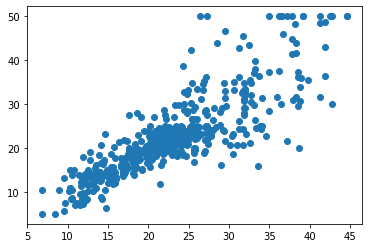

In [12]:
plt.scatter(pred,y)

K nearest neighbors looks for the nearest neighbor i.e. nearest datapoint in order to predict the varaible.
We have to think well if the model is the one we want to use, or we need to to some pre-processing.

We have to pre process the x in order for the model to make sense and the model to predict in the correct way.

Data -x -scale -knn-predict <br>
     -y <br>

We can include scaling as a part of the model, and use .fit to it.

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [14]:
mod3=KNeighborsRegressor().fit(X,y)
pipe3=Pipeline([
    ("scale",StandardScaler()),
    ("model",KNeighborsRegressor())
])

In [15]:
pipe3.fit(X,y)

Pipeline(steps=[('scale', StandardScaler()), ('model', KNeighborsRegressor())])

In [16]:
pred3=pipe3.predict(X) #predict using dataset X, we predict using the same data as we fit

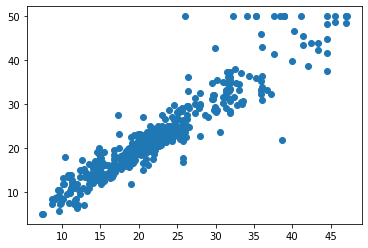

In [17]:
plt.scatter(pred3,y)

We are taking the original data to evaluate our prediction. Lets take only 1 nearest neighbor.

In [18]:
mod4=KNeighborsRegressor().fit(X,y)
pipe4=Pipeline([
    ("scale",StandardScaler()),
    ("model",KNeighborsRegressor(n_neighbors=1))
]) #changed number of neighbors 

In [19]:
pipe4.fit(X,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('model', KNeighborsRegressor(n_neighbors=1))])

In [20]:
pred4=pipe4.predict(X)

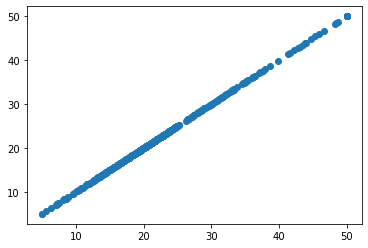

In [21]:
plt.scatter(pred4,y)

It seems like we are maing a perfect prediction. But that is only because we are predicting on the same dataset we used to fit the data. This raises a question - how many neighbors should we choose in order for our forecast to be the best?

Lets split the dataset into 3 and train on two, wile test on the third part. We can do this three times.

I will introduce the GridSearchCV. 

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
pipe4.get_params() #all the parameters in the model

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('model', KNeighborsRegressor(n_neighbors=1))],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsRegressor(n_neighbors=1),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 1,
 'model__p': 2,
 'model__weights': 'uniform'}

In [24]:
mod5=GridSearchCV(estimator=pipe4,param_grid={'model__n_neighbors':[1,2,3,4,5,6,7,8,9,10]},cv=3)
# par_grid are all parameters we want to go through/tweek
# i want to change the parameter number of neighbors and check the model for all 10 options of numbers of neighbors
# i also want to cross validate and set the cv parameter to 3

In [25]:
pipe4.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scale', 'model', 'scale__copy', 'scale__with_mean', 'scale__with_std', 'model__algorithm', 'model__leaf_size', 'model__metric', 'model__metric_params', 'model__n_jobs', 'model__n_neighbors', 'model__p', 'model__weights'])

In [26]:
mod5.fit(X,y);
pd.DataFrame(mod5.cv_results_) #put this in tha pandas dataframe for a nice overview

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000671,4.744657e-04,0.003572,3.648185e-03,1,{'model__n_neighbors': 1},0.226933,0.432998,0.127635,0.262522,0.127179,10
1,0.001001,9.199649e-07,0.000999,1.072147e-06,2,{'model__n_neighbors': 2},0.358216,0.409229,0.172294,0.313246,0.101821,9
2,0.000667,4.716516e-04,0.001333,4.714274e-04,3,{'model__n_neighbors': 3},0.413515,0.476651,0.318534,0.402900,0.064986,1
3,0.000667,4.715390e-04,0.001000,4.899036e-07,4,{'model__n_neighbors': 4},0.475349,0.402495,0.273014,0.383619,0.083675,7
4,0.001001,2.360224e-06,0.001025,3.574106e-05,5,{'model__n_neighbors': 5},0.512318,0.347951,0.262590,0.374286,0.103638,8
5,0.001000,2.247832e-07,0.001000,1.123916e-07,6,{'model__n_neighbors': 6},0.533611,0.389504,0.248482,0.390532,0.116406,6
6,0.001057,7.929281e-05,0.001667,4.669871e-04,7,{'model__n_neighbors': 7},0.544782,0.385199,0.243668,0.391216,0.123003,5
7,0.001001,7.867412e-07,0.001000,1.123916e-07,8,{'model__n_neighbors': 8},0.589644,0.394650,0.209714,0.398003,0.155124,2
8,0.001024,3.749688e-05,0.001345,4.512523e-04,9,{'model__n_neighbors': 9},0.590352,0.407556,0.185253,0.394387,0.165643,3
9,0.000969,4.791851e-05,0.001318,4.823062e-04,10,{'model__n_neighbors': 10},0.616510,0.395077,0.164023,0.391870,0.184741,4


Now we can see all the different statistics and decide which model is the best!

However, I havent yet looked inside the dataset! 

In [27]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Is 506 houses enough for our conclusion? When is this dataset from, is it outdated? B? Is the dataset racist? I definitely can do better! (Ps. This dataset will be deleted from scikit library soon)

It is important to stay sceptical!

In the plot above, we have very high expectations. Is this realistic? Also, grid-search should be re-thought.
It is easy to use scikit learn, but it is diggicult to understand the data and story behind it.

### Pre-processing

The purpose is to improve the performance of the model.

E.g. different scales in x and y, outliers. 
So, we want to rescale the data. I can use StandardScaler from scikit learn.

Example

In [28]:
from sklearn.preprocessing import StandardScaler

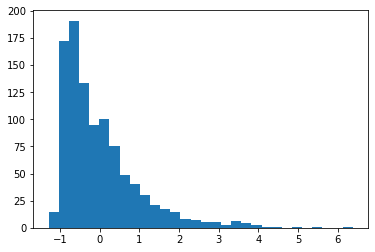

In [29]:
x=np.random.exponential(10,(1000))+np.random.normal(0,1,(1000))
plt.hist((x-np.mean(x))/np.std(x),30); #simulation of what StandardScaler does

Weakness: The outliers still exist.

Idea: if we use quantiles instead of standard dev there might be less outliers.

In [30]:
from sklearn.preprocessing import QuantileTransformer

In [31]:
#x_new=QuantileTransformer(n_quantiles=100).fit_transform(x)
#plt.scatter(x_new[:,0],x_new[:,1],c=y)

In [32]:
#plot_output(scaler=StandardScaler())

In [33]:
#plot_output(scaler=QuantileTransformer(n_quantiles=100))

Conclusion=QT is more stabile

Preprocessing on classes - transform text data f=to numeric data. I will use OneHotEncoder.

In [34]:
from sklearn.preprocessing import OneHotEncoder

In [35]:
arr=np.array(["low","low","high","medium"]).reshape(-1,1)
arr

array([['low'],
       ['low'],
       ['high'],
       ['medium']], dtype='<U6')

In [36]:
enc=OneHotEncoder(sparse=False,handle_unknown='ignore') #sparse=false means we will see what is in the sparse array
enc.fit_transform(arr)

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [37]:
enc.transform([["zero"]]) #asking enc to transform something he never saw before

array([[0., 0., 0.]])

### Metrics

We compare out predicted y with the originial y using a metric.

In [38]:
df = pd.read_csv('https://query.data.world/s/c6qoasfxtuksytje2zh3icfnniroxy')[:80_000]

We want to predict the class. All features present the characteristic of a transactions (V1-V28). Those are xs. And y is the class.

In [39]:
X=df.drop(columns=['Time','Amount','Class']).values
y=df['Class'].values
f"Shapes of X={X.shape}y={y.shape}, #Fraud Cases={y.sum()}" #lets see whats kind of dataset it is

'Shapes of X=(80000, 29)y=(80000,), #Fraud Cases=196'

We can see this dataset is unbalanced, as there should be more fraud cases than no-fraud cases. And here we only have 196 cases out of 80k.

In [40]:
#logistic regression
from sklearn.linear_model import LogisticRegression

mod=LogisticRegression (max_iter=1000) #as this dataset is so imbalanced I have to adjust number of iterations (increase it)
mod.fit(X,y).predict(X) #Fit and predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
mod.fit(X,y).predict(X).sum()

147

Model predicts less cases then there actually is.

In [42]:
mod=LogisticRegression (class_weight={0:1,1:2},max_iter=1000) #class weight allows me to give weight to each class; for class 0 I assign weight 1 (non fraud), for class 1 (fraud), i give weight 2 so there is more weight on that class
mod.fit(X,y).predict(X).sum() #Fit and predict

167

I got more cases!

In [43]:
from sklearn.model_selection import GridSearchCV

grid=GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={'class_weight':[{0:1,1:2} for v in range(1,4)]},
    cv=4, #4 cross validations
    n_jobs=-1) 
grid.fit(X,y)

GridSearchCV(cv=4, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 2},
                                          {0: 1, 1: 2}]})

In [44]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,5.107790,3.862109,0.002500,0.002598,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.9425,0.9984,0.9996,0.9978,0.984575,0.024301,1
1,5.213669,3.717023,0.006594,0.002759,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.9425,0.9984,0.9996,0.9978,0.984575,0.024301,1
2,4.547659,3.130522,0.004002,0.002918,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.9425,0.9984,0.9996,0.9978,0.984575,0.024301,1


We have score for each model, how did it come to this score if we didn't provide any metrics?
The model has a bound method called score which is used (from metrics import accuracu_score) this is default. If we don't specify differently this will be the metrics.
No, lets change it.

In [45]:
from sklearn.metrics import precision_score, recall_score, make_scorer

precision_score(y,grid.predict(X)) #we pass it true and predicted values

0.7904191616766467

In [46]:
recall_score(y,grid.predict(X)) 

0.673469387755102

Recall tells me did i get all the fraud cases, precision says how accurate am i?

Lets focus on precision.

In [47]:
grid=GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={'class_weight':[{0:1,1:2} for v in range(1,4)]},
    scoring={'precision':make_scorer(precision_score), 'recall_score':make_scorer(recall_score)},
    refit='precision',#we have to mention this in order to tell the model that we want scikit to optimas over this exact scorer
    return_train_score=True,
    cv=4, #4 cross validations
    n_jobs=-1) 
grid.fit(X,y)

GridSearchCV(cv=4, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 2},
                                          {0: 1, 1: 2}]},
             refit='precision', return_train_score=True,
             scoring={'precision': make_scorer(precision_score),
                      'recall_score': make_scorer(recall_score)})

In [48]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,split3_test_recall_score,mean_test_recall_score,std_test_recall_score,rank_test_recall_score,split0_train_recall_score,split1_train_recall_score,split2_train_recall_score,split3_train_recall_score,mean_train_recall_score,std_train_recall_score
0,5.284830,3.819094,0.021852,0.009487,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.038558,1.0,0.955556,0.857143,...,0.122449,0.571429,0.346639,1,0.843537,0.646259,0.585034,0.795918,0.717687,0.105661
1,5.308430,3.687167,0.018795,0.003973,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.038558,1.0,0.955556,0.857143,...,0.122449,0.571429,0.346639,1,0.843537,0.646259,0.585034,0.795918,0.717687,0.105661
2,4.574078,2.937535,0.013359,0.011201,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.038558,1.0,0.955556,0.857143,...,0.122449,0.571429,0.346639,1,0.843537,0.646259,0.585034,0.795918,0.717687,0.105661


Now I have well set up the grid search. Let's do a proper run.

In [49]:
grid=GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={'class_weight':[{0:1,1:2} for v in np.linspace(1,20,30)]}, #gives higher resolution than range
    scoring={'precision':make_scorer(precision_score), 'recall_score':make_scorer(recall_score)},
    refit='precision',#we have to mention this in order to tell the model that we want scikit to optimas over this exact scorer
    return_train_score=True,
    cv=10, #10 cross validations; more cv gives more accurate metrics
    n_jobs=-1) 
grid.fit(X,y)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 2},
                                          {0: 1, 1: 2}, {0: 1, 1: 2},
                                          {0: 1, 1: 2}, {0: 1, 1: 2},
                                          {0: 1, 1: 2}, {0: 1, 1: 2},
                                          {0: 1, 1: 2}, {0: 1, 1: 2},
                                          {0: 1, 1: 2}, {0: 1, 1: 2},
                                          {0: 1, 1: 2}, {0: 1, 1: 2},
                                          {0: 1, 1: 2}, {0: 1, 1: 2},
                                          {0: 1, 1: 2}, {0: 1, 1: 2},
                                          {0: 1, 1: 2}, {0: 1, 1: 2},
                                          {0: 1, 1: 2}, {0: 1, 1: 2},
                                          {0: 1, 1: 2}, {0: 1, 1: 2},
                                          {0: 1, 1: 2}, {0: 1, 1: 2},
              

In [50]:
#plot the test and train scores

#x is weight, y is scores; the middle is where I wanna be

#I can also make mu own scorer by taking a function of e.g. (min (recall,precision))

Make scorer

f(y_true,y_pred) -> s(est,X,y,w)

It takes true and predicted values from a metrics function, and turns them into a object where i can pass estimator, x, y and sample maker.

The idea is that sometimes you want to use that function in its original way, but sometimes you want to use it differently and you don't need to go back and forth.

Also adding weights helps making a better metrics.

Outlier detector

In [51]:
from collections import Counter
from sklearn.ensemble import IsolationForest
mod=IsolationForest().fit(X)
Counter(mod.predict(X))


Counter({1: 77152, -1: 2848})

In [52]:
np.where(mod.predict(X) ==-1,1,0)

array([0, 0, 0, ..., 0, 0, 0])

In [53]:
#1.19


## References

[1] scikit-learn. Available at http://scikit-learn.org.<br>
[2] scikit-learn. Install. Available at http://scikit-learn.org/stable/install.html. <br>
[3] Anaconda. Available at https://www.anaconda.com/. <br>
[4] NumPy documentation. Available at https://numpy.org/doc/stable/index.html. <br>
[5] SciPy documentation. Available at https://scipy.github.io/devdocs/index.html. <br>
[6] Matplotlib user guide. Available at https://matplotlib.org/stable/users/index. <br>